In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

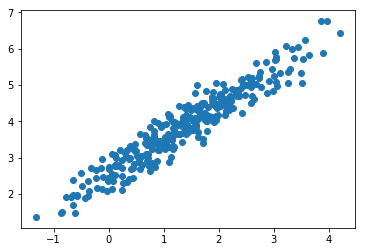

In [2]:
mean_01 = np.array([1.5, 4.0])
cov_val = np.array([[1, 0.95], [0.95, 1]])
dt = np.random.multivariate_normal(mean_01, cov_val, 300)
plt.scatter(dt[:,0], dt[:,1])
plt.show()

In [3]:
print dt.shape

(300, 2)


In [4]:
def h_val(x_data, theta):          #hypothesis value
    '''h = 0                       #for multivariate
    for ix in range(len(x_data)):
        h += x_data[ix] * theta[ix]
    h += theta[-1]
    '''
    h = theta[0]*x_data + theta[1]
    return h

def compute_loss_grad(X, theta, y):
    n = X.shape[0]
    grad1 = 0.0
    grad2 = 0.0
    for nx in range(n):
        error1 = (h_val(X[nx], theta) - y[nx])*X[nx]
        grad1 += error1
        
        error2 = (h_val(X[nx], theta) - y[nx])
        grad2 += error2
    grad1 = grad1/n
    grad2 = grad2/n
    return [grad1, grad2]
    
    return [grad1, grad2]

def update_weights(X, theta, y, alpha=0.1):
    grad = compute_loss_grad(X, theta, y)
    theta[0] = theta[0] - alpha*grad[0]
    theta[1] = theta[1] - alpha*grad[1]
    return theta

def adaptive_learning_rate(alpha, total_epochs, current_epoch):
    return alpha*np.exp(-2 * float(current_epoch) / total_epochs)


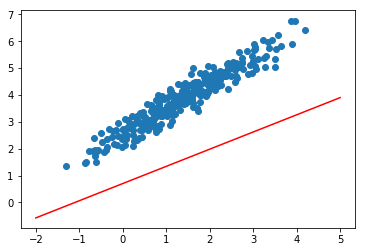

In [5]:
theta = [np.random.random(), np.random.random()]
nb_epoch = 200
alpha = 0.1

plt.figure(0)
plt.scatter(dt[:,0], dt[:,1])
pt1 = h_val(-2, theta)
pt2 = h_val(5, theta)
plt.plot([-2, 5], [pt1, pt2], 'r-')
plt.show()

In [6]:
def sum_of_square_error(X, theta, y):
    n = X.shape[0]
    loss = 0.0
    for nx in range(n):
        error = (y[nx] - h_val(X[nx], theta))**2
        loss += error
    loss = loss/n
    return loss

Error at Epoch 0 : 0.102018697156 	| alpha: 0.1
Error at Epoch 10 : 0.100397907375 	| alpha: 0.0904837418036
Error at Epoch 20 : 0.099558810583 	| alpha: 0.0818730753078
Error at Epoch 30 : 0.0991002845581 	| alpha: 0.0740818220682
Error at Epoch 40 : 0.0988372109808 	| alpha: 0.0670320046036
Error at Epoch 50 : 0.0986794936978 	| alpha: 0.0606530659713
Error at Epoch 60 : 0.0985811139362 	| alpha: 0.0548811636094
Error at Epoch 70 : 0.098517510798 	| alpha: 0.0496585303791
Error at Epoch 80 : 0.098475040394 	| alpha: 0.0449328964117
Error at Epoch 90 : 0.0984458414091 	| alpha: 0.0406569659741
Error at Epoch 100 : 0.098425230582 	| alpha: 0.0367879441171
Error at Epoch 110 : 0.0984103313854 	| alpha: 0.0332871083698
Error at Epoch 120 : 0.098399326843 	| alpha: 0.0301194211912
Error at Epoch 130 : 0.098391039366 	| alpha: 0.0272531793034
Error at Epoch 140 : 0.0983846875019 	| alpha: 0.0246596963942
Error at Epoch 150 : 0.0983797412648 	| alpha: 0.0223130160148
Error at Epoch 160 : 0.

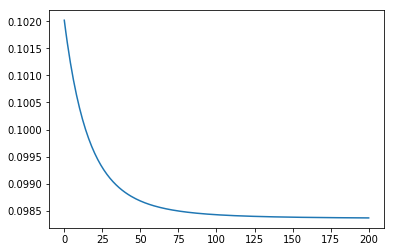

In [12]:
all_errors = []
for ix in range(nb_epoch+1):
    alpha_val = adaptive_learning_rate(alpha, current_epoch=ix, total_epochs=nb_epoch)
    #alpha_val = alpha
    error = sum_of_square_error(dt[:,0], theta, dt[:,1])
    all_errors.append(error)
    if ix%10 == 0:
        print "Error at Epoch", ix, ":", error, '\t| alpha:', alpha_val
    theta = update_weights(dt[:,0], theta, dt[:,1], alpha_val)

plt.plot(all_errors)
plt.show()

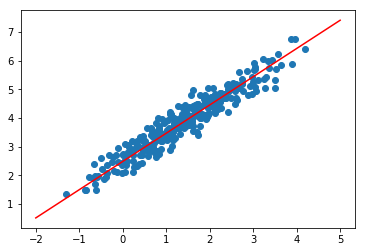

In [9]:
plt.figure(0)
plt.scatter(dt[:,0], dt[:,1])
pt1 = h_val(-2, theta)
pt2 = h_val(5, theta)
plt.plot([-2, 5], [pt1, pt2], 'r-')
plt.show()